__Imports__

In [39]:
from src.utils import read_data
from src.visualizations import *
from src.analysis import *

In [40]:
import warnings
warnings.filterwarnings("ignore")

__Read the datasets__

In [41]:
df_worldwide_cases = read_data('Monkey_Pox_Cases_Worldwide_Cleaned.csv')
df_daily_cases = read_data('Daily_Country_Wise_Confirmed_Cases.csv')
df_detection_timeline = read_data('Worldwide_Case_Detection_Timeline_Cleaned.csv')

__Basic EDA__

In [42]:
df_worldwide_cases.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Country-Continent,lat,lon
0,England,3412.0,0.0,5.0,2.0,7.0,"('Unknown', 'Unknown')",25.029422,-77.361956
1,Portugal,908.0,0.0,0.0,0.0,34.0,"('PT', 'EU')",39.662165,-8.135352
2,Spain,7083.0,0.0,13.0,2.0,0.0,"('ES', 'EU')",39.326068,-4.837979
3,United States,24403.0,0.0,4.0,41.0,11.0,"('US', 'NA')",39.783730,-100.445882
4,Canada,1388.0,12.0,1.0,5.0,0.0,"('CA', 'NA')",61.066692,-107.991707


In [43]:
df_worldwide_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             129 non-null    object 
 1   Confirmed_Cases     129 non-null    float64
 2   Suspected_Cases     129 non-null    float64
 3   Hospitalized        129 non-null    float64
 4   Travel_History_Yes  129 non-null    float64
 5   Travel_History_No   129 non-null    float64
 6   Country-Continent   129 non-null    object 
 7   lat                 127 non-null    float64
 8   lon                 127 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.2+ KB


In [44]:
df_worldwide_cases.describe()

,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,lat,lon
count,129.000000,129.000000,129.000000,129.000000,129.000000,127.000000,127.000000
mean,505.542636,28.472868,1.170543,2.124031,0.705426,26.408035,-0.170443
std,2376.143711,254.846647,2.795432,4.758229,3.512040,24.182222,66.163458
min,0.000000,0.000000,0.000000,0.000000,0.000000,-41.500083,-107.991707
25%,2.000000,0.000000,0.000000,0.000000,0.000000,12.646835,-68.206867
50%,6.000000,0.000000,0.000000,1.000000,0.000000,26.254049,10.333328
75%,77.000000,0.000000,1.000000,2.000000,0.000000,45.688828,29.579279
max,24403.000000,2852.000000,18.000000,41.000000,34.000000,77.619235,179.012274


In [45]:
df_detection_timeline.describe()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
count,65546,65546,1245,2955,2425,195,328,449,338
unique,141,112,164,92,2,95,2,1,2
top,2022-08-22,United States,Toronto,20-69,M,genital ulcer lesions,N,Y,Y
freq,2063,24663,486,615,2405,30,199,449,249


On seeing the above data, we can clearly say certain things about our data
* The most affected country is the United States
* The most affected city is Toronto, Canada
* Most number of people infected are male, but most infected people are not hospitalized

__Visualization and Analysis__

1. Let's first take a look at the spread of the MonkeyPox disease in various parts of the world

__North America__

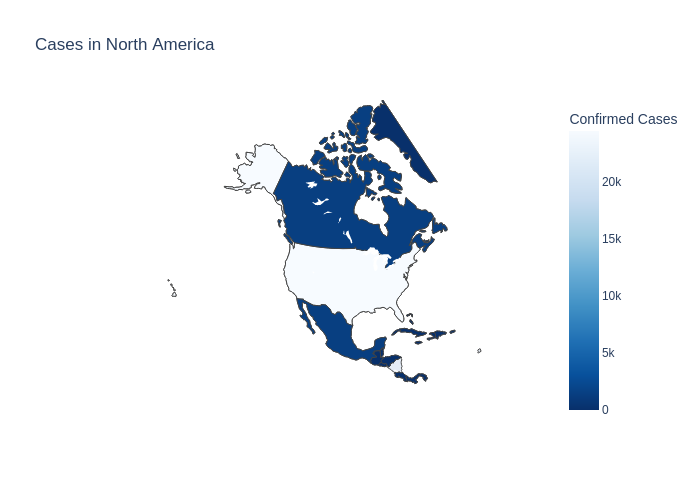

In [46]:
fig = cases_on_map(df_worldwide_cases, region="north america")
fig.show("png")

__South America__

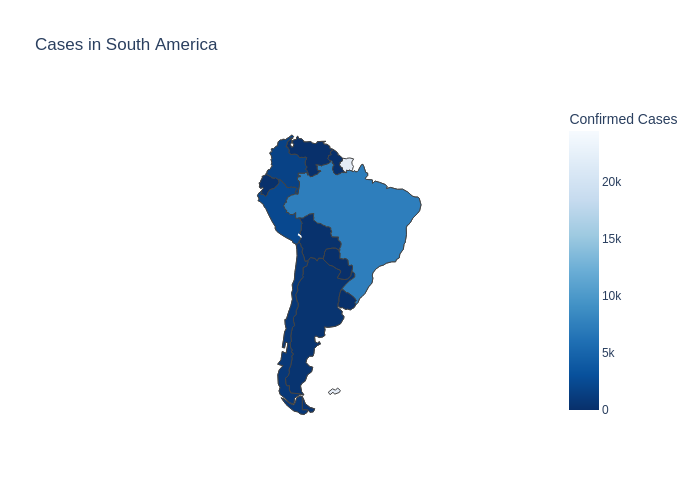

In [47]:
fig = cases_on_map(df_worldwide_cases, region="south america")
fig.show("png")

__Europe__

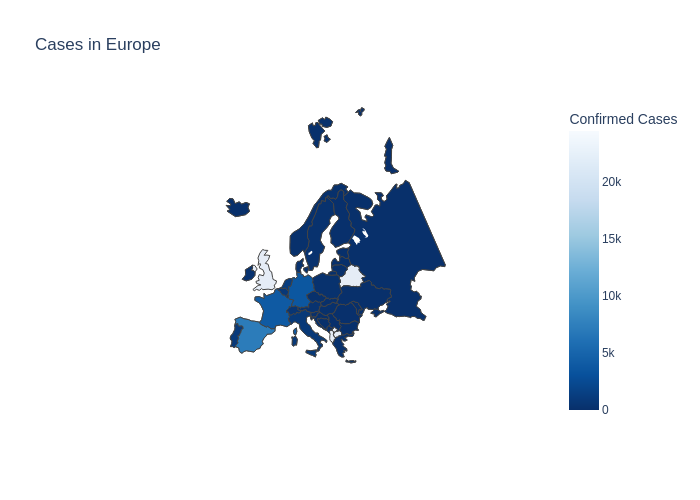

In [48]:
fig = cases_on_map(df_worldwide_cases, region="europe")
fig.show("png")

__Africa__

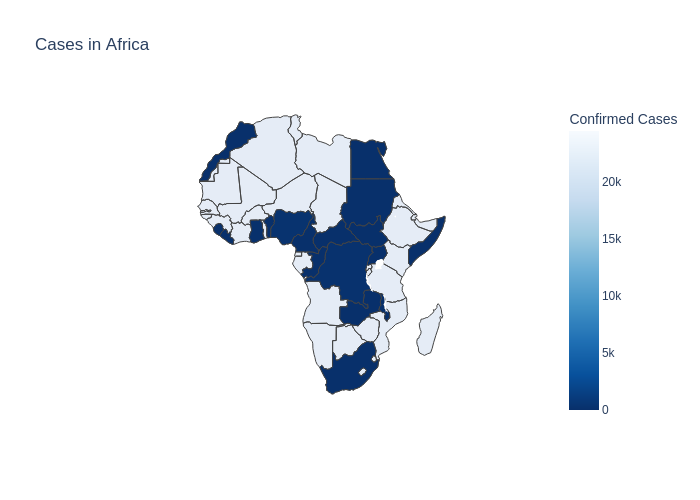

In [49]:
fig = cases_on_map(df_worldwide_cases, region="africa")
fig.show("png")

__Asia__

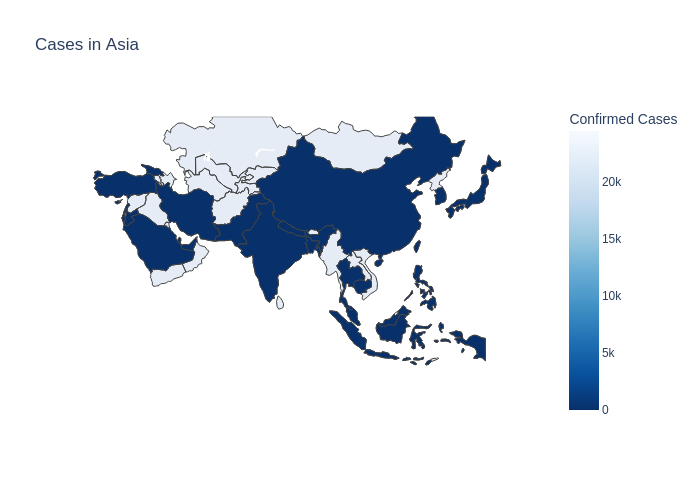

In [50]:
fig = cases_on_map(df_worldwide_cases, region="asia")
fig.show("png")

2. Now, let's see the timeline of cases growth

__Growth of confirmed cases__

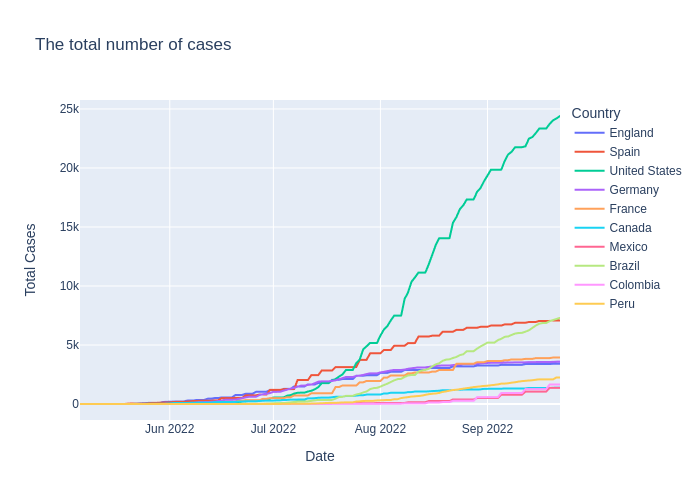

In [51]:
fig = case_trends(df_worldwide_cases, df_daily_cases)
fig.show("png")

__Daily Change in Confirmed Cases (Aug 2022 and beyond)__

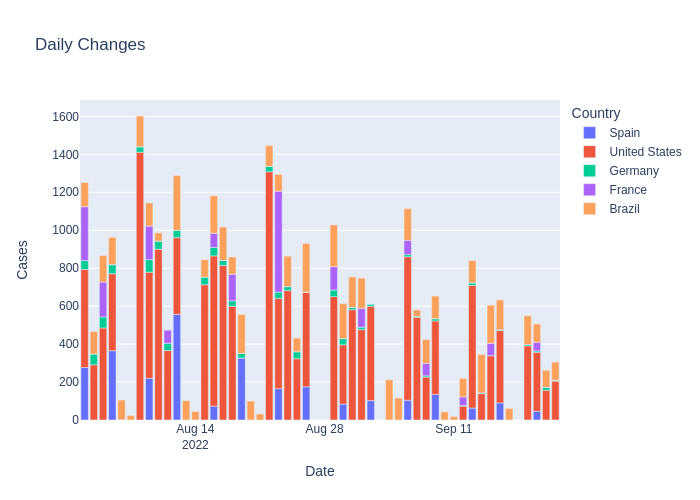

In [52]:
fig = daily_changes(df_worldwide_cases,df_daily_cases)
fig.show("png")

3. Cities Affected

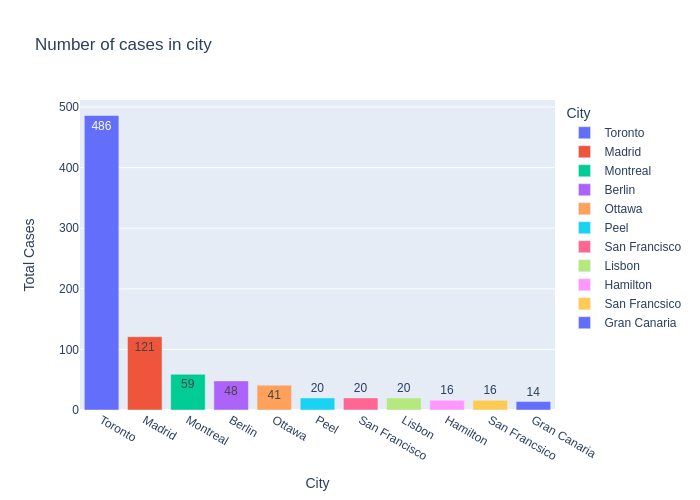

In [53]:
fig = cases_cities(df_detection_timeline)
fig.show("png")

4. Number of suspected cases

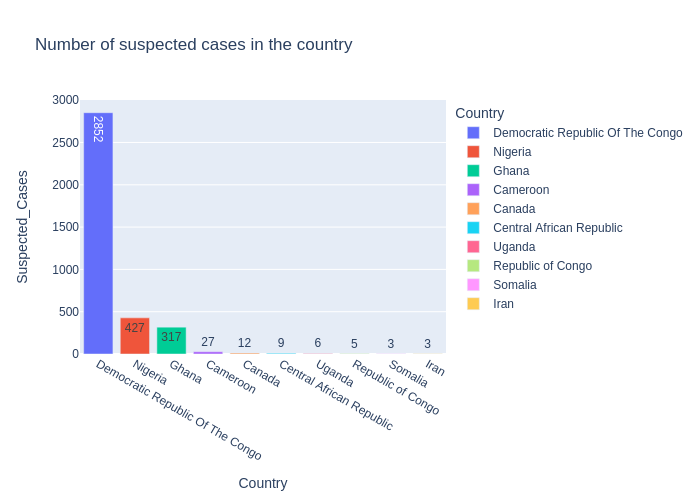

In [54]:
fig = suspected_cases_bar(df_worldwide_cases)
fig.show("png")

5. Travel History and Hospitalizations

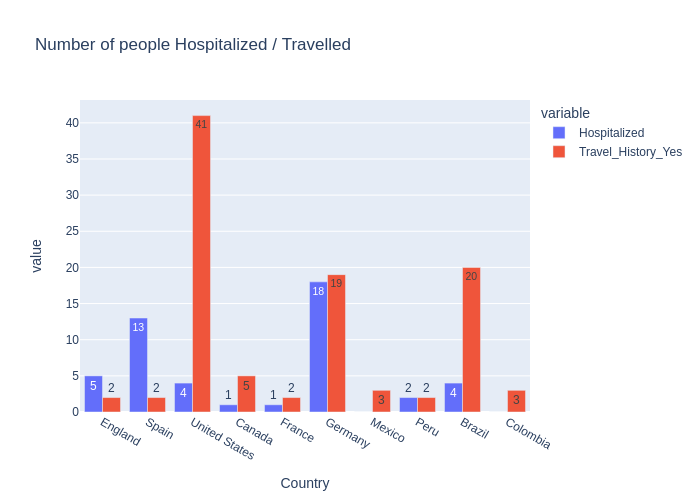

In [55]:
fig = hospitalized_and_travelled(df_worldwide_cases)
fig.show("png")

6. Symptoms

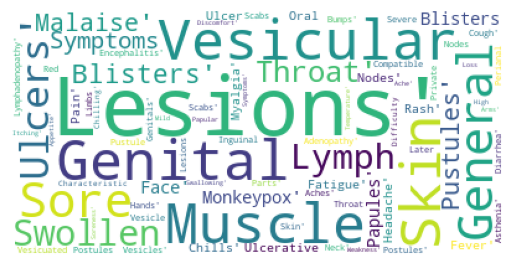

In [56]:
fig = symptoms_word_cloud(df_detection_timeline)
fig.show()

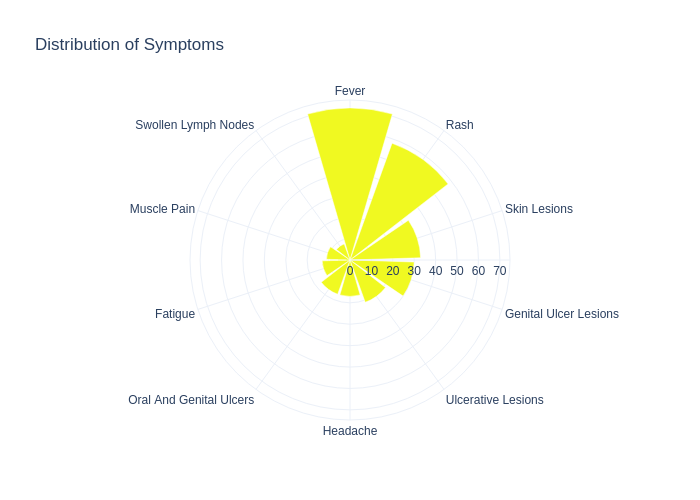

In [57]:
fig = symptoms_distribution(df_detection_timeline)
fig.show("png")

7. Correlation of various features

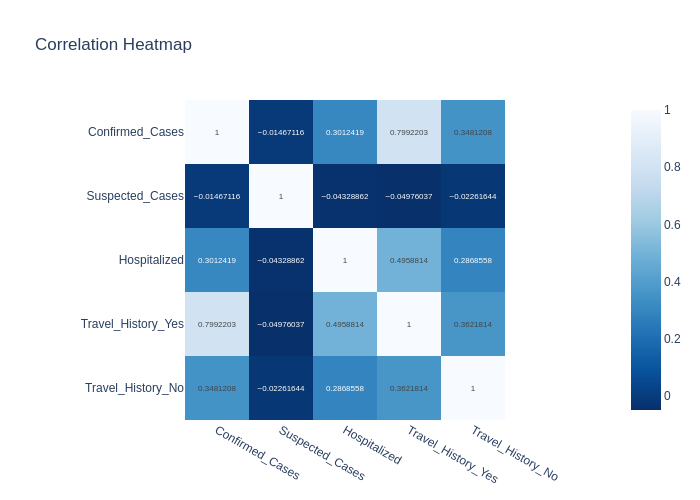

In [58]:
fig = correlation_heatmap(df_worldwide_cases)
fig.show("png")

<font size="4"><b>Analysis of how various attributes affect hospitalization</font></b><br>
1.__Hospitalization of people based on genders__: We can observe that majority of hospitalization occured in males

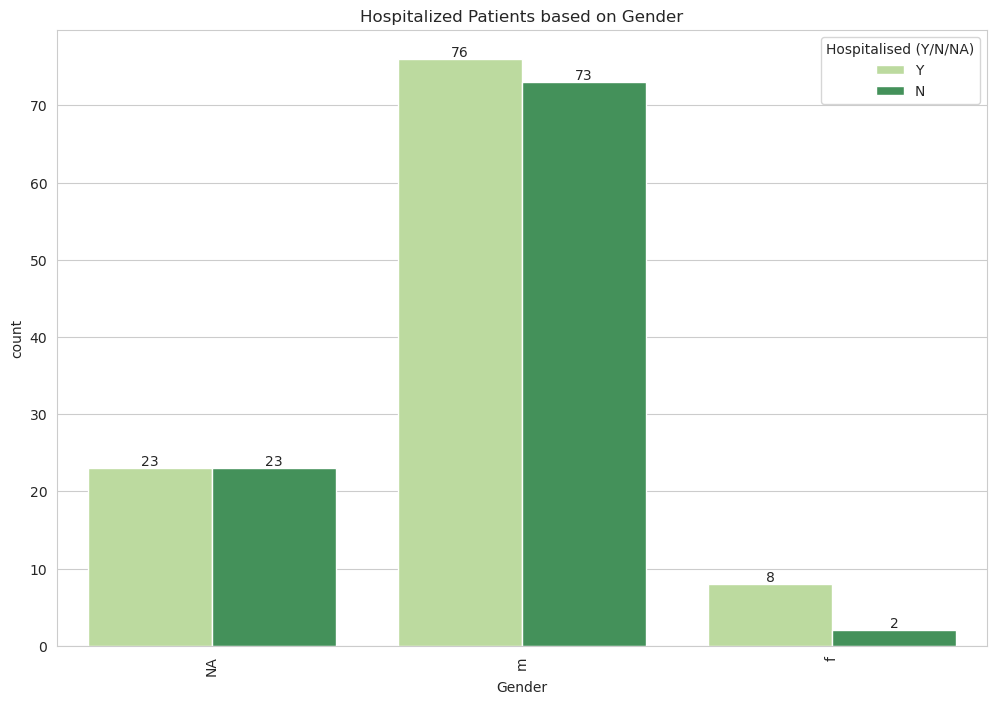

In [59]:
hospitalization_gender(df_detection_timeline)

__2.Virus deteteced people based on Age group__: We can observe that majority of virus was detected in people in there 40s

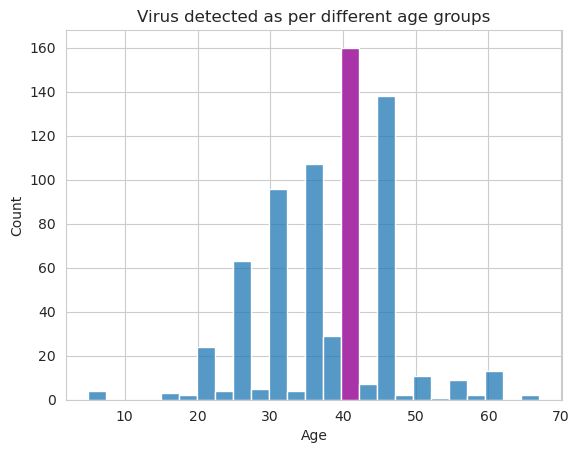

In [60]:
virus_vs_age_group(df_detection_timeline)

3.__Hospitalization of people based on genders__: We can observe that majority of hospitalization occured people in there 30s

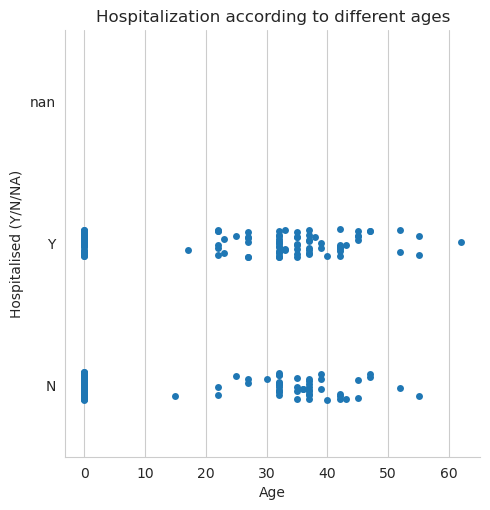

In [61]:
hospitalization_vs_age(df_detection_timeline)

4.__Hospitalization of based on symptoms__: We can observe that majority of hospitalization occured due to rashes,fever 
                                            and lesion symptoms in people

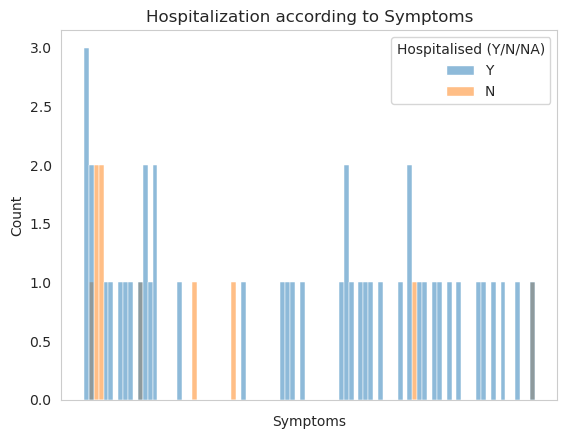

In [62]:
hospitalization_symptoms(df_detection_timeline)

__US vs World__

It is evident that the US has the highest number of cases. We want to compare how the confirmed cases and other statistics change for the US when compared to the world

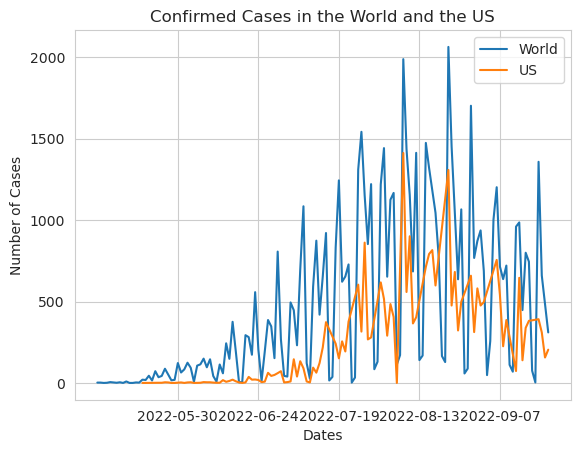

In [63]:
fig = US_world_timeline(df_detection_timeline)
fig.show()

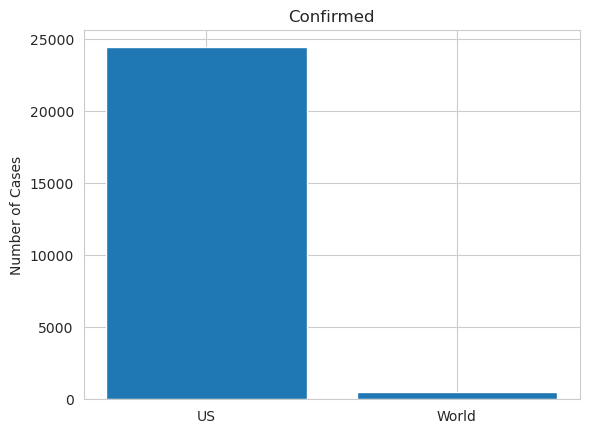

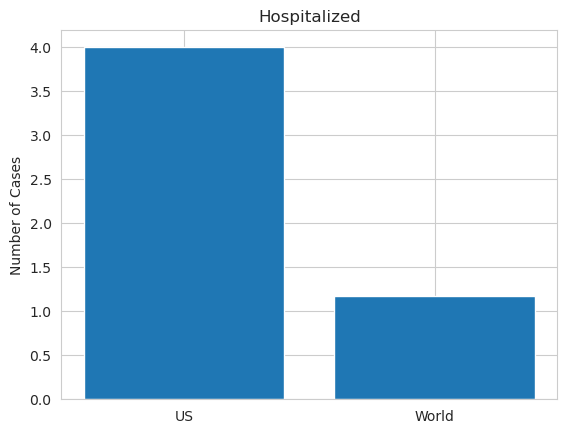

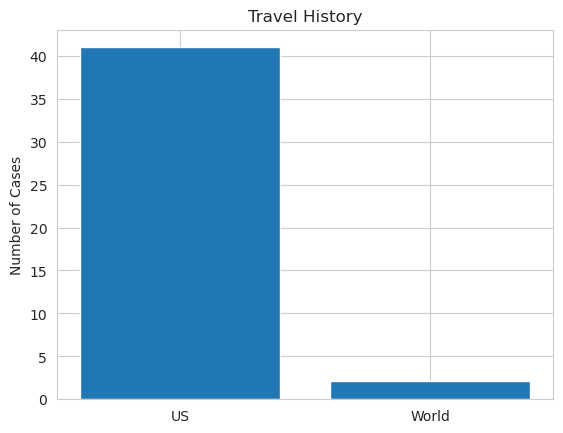

In [64]:
conf_fig, hosp_fig, trav_fig = US_world_histogram(df_worldwide_cases)
conf_fig.show()
hosp_fig.show()
trav_fig.show()